# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [63]:
import pandas as pd
import numpy as np

df = pd.read_csv("03-09-2021.csv")
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-03-10 05:24:35,33.93911,67.709953,55876,2451,49409.0,4016.0,Afghanistan,143.535529,4.386499
1,NaN,NaN,NaN,Albania,2021-03-10 05:24:35,41.15330,20.168300,114209,1969,76784.0,35456.0,Albania,3968.621864,1.724032
2,NaN,NaN,NaN,Algeria,2021-03-10 05:24:35,28.03390,1.659600,114543,3022,79319.0,32202.0,Algeria,261.209294,2.638311
3,NaN,NaN,NaN,Andorra,2021-03-10 05:24:35,42.50630,1.521800,11089,112,10685.0,292.0,Andorra,14351.905779,1.010010
4,NaN,NaN,NaN,Angola,2021-03-10 05:24:35,-11.20270,17.873900,21114,516,19677.0,921.0,Angola,64.242159,2.443876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,Unknown,Ukraine,2021-03-10 05:24:35,NaN,NaN,0,0,0.0,0.0,"Unknown, Ukraine",0.000000,0.000000
4010,NaN,NaN,NaN,Nauru,2021-03-10 05:24:35,-0.52280,166.931500,0,0,0.0,0.0,Nauru,0.000000,0.000000
4011,NaN,NaN,Niue,New Zealand,2021-03-10 05:24:35,-19.05440,-169.867200,0,0,0.0,0.0,"Niue, New Zealand",0.000000,0.000000
4012,NaN,NaN,NaN,Tuvalu,2021-03-10 05:24:35,-7.10950,177.649300,0,0,0.0,0.0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [64]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-03-10 05:24:35,33.93911,67.709953,55876,2451,49409.0,4016.0,Afghanistan,143.535529,4.386499
1,NaN,NaN,NaN,Albania,2021-03-10 05:24:35,41.15330,20.168300,114209,1969,76784.0,35456.0,Albania,3968.621864,1.724032
2,NaN,NaN,NaN,Algeria,2021-03-10 05:24:35,28.03390,1.659600,114543,3022,79319.0,32202.0,Algeria,261.209294,2.638311
3,NaN,NaN,NaN,Andorra,2021-03-10 05:24:35,42.50630,1.521800,11089,112,10685.0,292.0,Andorra,14351.905779,1.010010
4,NaN,NaN,NaN,Angola,2021-03-10 05:24:35,-11.20270,17.873900,21114,516,19677.0,921.0,Angola,64.242159,2.443876


#### Show the information of the dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            739 non-null    float64
 10  Active               739 non-null    float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3968 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.2+ KB


#### Show the sum of missing values of features in the dataset

In [66]:
df.isna().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3275
Active                 3275
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      46
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [67]:
country_cases = df[["Country_Region","Confirmed"]]
country_cases

,Country_Region,Confirmed
0,Afghanistan,55876
1,Albania,114209
2,Algeria,114543
3,Andorra,11089
4,Angola,21114
...,...,...
4009,Ukraine,0
4010,Nauru,0
4011,New Zealand,0
4012,Tuvalu,0


#### Show the number of Deaths by Country

In [68]:
country_Deaths = df[["Country_Region","Deaths"]]
country_Deaths

,Country_Region,Deaths
0,Afghanistan,2451
1,Albania,1969
2,Algeria,3022
3,Andorra,112
4,Angola,516
...,...,...
4009,Ukraine,0
4010,Nauru,0
4011,New Zealand,0
4012,Tuvalu,0


#### Show the number of Recovered cases by Country

In [69]:
country_recover = df[["Country_Region","Recovered"]]
country_recover

,Country_Region,Recovered
0,Afghanistan,49409.0
1,Albania,76784.0
2,Algeria,79319.0
3,Andorra,10685.0
4,Angola,19677.0
...,...,...
4009,Ukraine,0.0
4010,Nauru,0.0
4011,New Zealand,0.0
4012,Tuvalu,0.0


#### Show the number of Active Cases by Country

In [70]:
country_active = df[["Country_Region","Active"]]
country_active

,Country_Region,Active
0,Afghanistan,4016.0
1,Albania,35456.0
2,Algeria,32202.0
3,Andorra,292.0
4,Angola,921.0
...,...,...
4009,Ukraine,0.0
4010,Nauru,0.0
4011,New Zealand,0.0
4012,Tuvalu,0.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [71]:
country_latest = df[["Country_Region","Confirmed" , "Deaths" , "Recovered" , "Active"]]
country_latest

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,55876,2451,49409.0,4016.0
1,Albania,114209,1969,76784.0,35456.0
2,Algeria,114543,3022,79319.0,32202.0
3,Andorra,11089,112,10685.0,292.0
4,Angola,21114,516,19677.0,921.0
...,...,...,...,...,...
4009,Ukraine,0,0,0.0,0.0
4010,Nauru,0,0,0.0,0.0
4011,New Zealand,0,0,0.0,0.0
4012,Tuvalu,0,0,0.0,0.0


### Question 3

### Show the countries with no recovered cases

In [72]:
country_norecover = country_recover.loc[country_recover["Recovered"] == 0]
country_norecover

,Country_Region,Recovered
9,Australia,0.0
23,Belgium,0.0
24,Belgium,0.0
25,Belgium,0.0
26,Belgium,0.0
...,...,...
4009,Ukraine,0.0
4010,Nauru,0.0
4011,New Zealand,0.0
4012,Tuvalu,0.0


#### Show the countries with no confirmed cases

In [73]:
country_nocases = country_cases.loc[country_cases["Confirmed"] == 0]
country_nocases

,Country_Region,Confirmed
78,Canada,0
175,Colombia,0
282,India,0
416,Mexico,0
615,Spain,0
703,US,0
715,US,0
724,US,0
745,US,0
759,US,0


#### Show the countries with no deaths

In [74]:
country_noD = country_Deaths.loc[country_Deaths["Deaths"] == 0]
country_noD

,Country_Region,Deaths
10,Australia,0
23,Belgium,0
24,Belgium,0
25,Belgium,0
26,Belgium,0
...,...,...
4009,Ukraine,0
4010,Nauru,0
4011,New Zealand,0
4012,Tuvalu,0


In [75]:
country_detail = df[["Country_Region","Confirmed" , "Deaths" , "Recovered"]]
country_detailnoD = country_detail.loc[country_detail["Deaths"]==0]
country_detailnoD

,Country_Region,Confirmed,Deaths,Recovered
10,Australia,105,0,105.0
23,Belgium,99832,0,0.0
24,Belgium,98011,0,0.0
25,Belgium,86385,0,0.0
26,Belgium,61144,0,0.0
...,...,...,...,...
4009,Ukraine,0,0,0.0
4010,Nauru,0,0,0.0
4011,New Zealand,0,0,0.0
4012,Tuvalu,0,0,0.0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [76]:

top_10C = df.nlargest(10, "Confirmed")
top_10C

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
216,NaN,NaN,NaN,France,2021-03-10 05:24:35,46.227600,2.213700,3906363,88811,239851.0,3577701.0,France,5986.777623,2.273496
3960,NaN,NaN,England,United Kingdom,2021-03-10 05:24:35,52.355500,-1.174300,3703136,129750,0.0,3593265.0,"England, United Kingdom",6615.436285,2.966972
650,NaN,NaN,NaN,Turkey,2021-03-10 05:24:35,38.963700,35.243300,2807387,29160,2640669.0,137558.0,Turkey,3328.691080,1.038688
269,NaN,NaN,Maharashtra,India,2021-03-10 05:24:35,19.449759,76.108221,2238398,52556,2089294.0,96548.0,"Maharashtra, India",1817.704433,2.347929
6,NaN,NaN,NaN,Argentina,2021-03-10 05:24:35,-38.416100,-63.616700,2162001,53252,1956591.0,152158.0,Argentina,4783.634984,2.463089
65,NaN,NaN,Sao Paulo,Brazil,2021-03-10 05:24:35,-23.550500,-46.633300,2134020,62101,1898463.0,173456.0,"Sao Paulo, Brazil",4647.352344,2.910048
490,NaN,NaN,NaN,Poland,2021-03-10 05:24:35,51.919400,19.145100,1811036,45599,1503353.0,262084.0,Poland,4785.200680,2.517841
287,NaN,NaN,NaN,Iran,2021-03-10 05:24:35,32.427908,53.688046,1706559,60867,1456759.0,188933.0,Iran,2031.788310,3.566651
594,NaN,NaN,NaN,South Africa,2021-03-10 05:24:35,-30.559500,22.937500,1522697,50906,1444282.0,27509.0,South Africa,2567.409599,3.343147
286,NaN,NaN,NaN,Indonesia,2021-03-10 05:24:35,-0.789300,113.921300,1392945,37757,1210877.0,144311.0,Indonesia,509.259491,2.710588


#### Show the Top 10 Countries with Active cases

In [77]:
top_10A = df.nlargest(10, "Active")
top_10A

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
3960,NaN,NaN,England,United Kingdom,2021-03-10 05:24:35,52.355500,-1.174300,3703136,129750,0.0,3593265.0,"England, United Kingdom",6615.436285,2.966972
216,NaN,NaN,NaN,France,2021-03-10 05:24:35,46.227600,2.213700,3906363,88811,239851.0,3577701.0,France,5986.777623,2.273496
477,NaN,NaN,Lima,Peru,2021-03-10 05:24:35,-11.766533,-76.604498,635962,59690,0.0,576272.0,"Lima, Peru",5983.553653,9.385781
393,NaN,NaN,Ciudad de Mexico,Mexico,2021-03-10 05:24:35,19.432600,-99.133200,574062,28462,0.0,545600.0,"Ciudad de Mexico, Mexico",6365.279928,4.958001
610,NaN,NaN,Madrid,Spain,2021-03-10 05:24:35,40.416800,-3.703800,597385,14211,40736.0,542438.0,"Madrid, Spain",8994.528317,2.378868
586,NaN,NaN,NaN,Serbia,2021-03-10 05:24:35,44.016500,21.005900,494106,4599,0.0,489507.0,Serbia,5655.088431,0.930772
605,NaN,NaN,Catalonia,Spain,2021-03-10 05:24:35,41.591200,1.520900,509596,11458,26203.0,471935.0,"Catalonia, Spain",6734.958661,2.248448
596,NaN,NaN,Andalusia,Spain,2021-03-10 05:24:35,37.544300,-4.727800,485759,8697,10671.0,466391.0,"Andalusia, Spain",5764.040057,1.790394
590,NaN,NaN,NaN,Slovakia,2021-03-10 05:24:35,48.669000,19.699000,631700,8037,255300.0,368363.0,Slovakia,11570.353593,1.272281
600,NaN,NaN,C. Valenciana,Spain,2021-03-10 05:24:35,39.484000,-0.753300,382062,6881,9970.0,365211.0,"C. Valenciana, Spain",7679.686044,1.801017


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [78]:
import matplotlib.pyplot as plt

In [79]:
country_List = df.loc[df["Deaths"]>50000]
country_List




,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
6,NaN,NaN,NaN,Argentina,2021-03-10 05:24:35,-38.416100,-63.616700,2162001,53252,1956591.0,152158.0,Argentina,4783.634984,2.463089
65,NaN,NaN,Sao Paulo,Brazil,2021-03-10 05:24:35,-23.550500,-46.633300,2134020,62101,1898463.0,173456.0,"Sao Paulo, Brazil",4647.352344,2.910048
216,NaN,NaN,NaN,France,2021-03-10 05:24:35,46.227600,2.213700,3906363,88811,239851.0,3577701.0,France,5986.777623,2.273496
269,NaN,NaN,Maharashtra,India,2021-03-10 05:24:35,19.449759,76.108221,2238398,52556,2089294.0,96548.0,"Maharashtra, India",1817.704433,2.347929
287,NaN,NaN,NaN,Iran,2021-03-10 05:24:35,32.427908,53.688046,1706559,60867,1456759.0,188933.0,Iran,2031.788310,3.566651
477,NaN,NaN,Lima,Peru,2021-03-10 05:24:35,-11.766533,-76.604498,635962,59690,0.0,576272.0,"Lima, Peru",5983.553653,9.385781
594,NaN,NaN,NaN,South Africa,2021-03-10 05:24:35,-30.559500,22.937500,1522697,50906,1444282.0,27509.0,South Africa,2567.409599,3.343147
3960,NaN,NaN,England,United Kingdom,2021-03-10 05:24:35,52.355500,-1.174300,3703136,129750,0.0,3593265.0,"England, United Kingdom",6615.436285,2.966972


<function matplotlib.pyplot.show(close=None, block=None)>

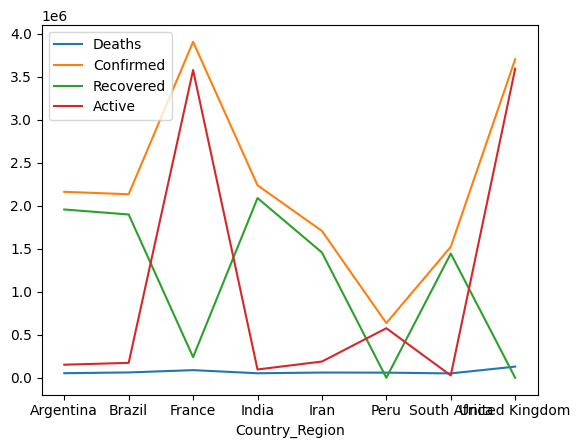

In [80]:
country_List.plot(x="Country_Region",y=["Deaths","Confirmed","Recovered","Active"])
plt.xlabel("Country_Region")
plt.show

### Question 6

### Plot Province/State wise Deaths in USA

In [81]:
import plotly.express as px

In [82]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [83]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [84]:
covid_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,NaN,NaN,Unknown,Ukraine,2021-01-10 05:22:12,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4008,NaN,NaN,NaN,Nauru,2021-01-10 05:22:12,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4009,NaN,NaN,Niue,New Zealand,2021-01-10 05:22:12,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4010,NaN,NaN,NaN,Tuvalu,2021-01-10 05:22:12,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


In [85]:
filtered_data = covid_data.loc[covid_data["Country_Region"]== "US"]
filtered_data2 = filtered_data.groupby("Province_State",as_index=False).sum()


In [86]:

px.bar(filtered_data2,x="Province_State",y="Deaths")
 

### Question 7

### Plot Province/State Wise Active Cases in USA

In [87]:
px.bar(filtered_data2,x="Province_State",y="Active")

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [88]:
px.bar(filtered_data2,x="Province_State",y="Confirmed")

### Question 9

### Plot Worldwide Confirmed Cases over time

In [89]:
import plotly.express as px
import plotly.io as pio

In [90]:

from datetime import datetime
df["Last_Update"] = df["Last_Update"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))


In [91]:
df["date"] = df["Last_Update"].dt.date
df["time"] = df["Last_Update"].dt.time

In [92]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,date,time
0,NaN,NaN,NaN,Afghanistan,2021-03-10 05:24:35,33.93911,67.709953,55876,2451,49409.0,4016.0,Afghanistan,143.535529,4.386499,2021-03-10,05:24:35
1,NaN,NaN,NaN,Albania,2021-03-10 05:24:35,41.15330,20.168300,114209,1969,76784.0,35456.0,Albania,3968.621864,1.724032,2021-03-10,05:24:35
2,NaN,NaN,NaN,Algeria,2021-03-10 05:24:35,28.03390,1.659600,114543,3022,79319.0,32202.0,Algeria,261.209294,2.638311,2021-03-10,05:24:35
3,NaN,NaN,NaN,Andorra,2021-03-10 05:24:35,42.50630,1.521800,11089,112,10685.0,292.0,Andorra,14351.905779,1.010010,2021-03-10,05:24:35
4,NaN,NaN,NaN,Angola,2021-03-10 05:24:35,-11.20270,17.873900,21114,516,19677.0,921.0,Angola,64.242159,2.443876,2021-03-10,05:24:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,Unknown,Ukraine,2021-03-10 05:24:35,NaN,NaN,0,0,0.0,0.0,"Unknown, Ukraine",0.000000,0.000000,2021-03-10,05:24:35
4010,NaN,NaN,NaN,Nauru,2021-03-10 05:24:35,-0.52280,166.931500,0,0,0.0,0.0,Nauru,0.000000,0.000000,2021-03-10,05:24:35
4011,NaN,NaN,Niue,New Zealand,2021-03-10 05:24:35,-19.05440,-169.867200,0,0,0.0,0.0,"Niue, New Zealand",0.000000,0.000000,2021-03-10,05:24:35
4012,NaN,NaN,NaN,Tuvalu,2021-03-10 05:24:35,-7.10950,177.649300,0,0,0.0,0.0,Tuvalu,0.000000,0.000000,2021-03-10,05:24:35


In [93]:
px.bar(df,x="Last_Update",y="Confirmed")

c:\Users\chunl\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

